<a href="https://colab.research.google.com/github/EstherMamai/Facial-recognition-/blob/main/Potato_Training_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Constants.

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

## Generating a tf.data.Dataset from image files in a directory.

<pre class="lang-py tfo-signature-link" translate="no" dir="ltr" is-upgraded=""><code dir="ltr"><span class="pln">tf</span><span class="pun">.</span><span class="pln">keras</span><span class="pun">.</span><span class="pln">utils</span><span class="pun">.</span><span class="pln">image_dataset_from_directory</span><span class="pun">(</span><span class="pln"><br>&nbsp; &nbsp; directory</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; labels</span><span class="pun">=</span><span class="str">'inferred'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; label_mode</span><span class="pun">=</span><span class="str">'int'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; class_names</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; color_mode</span><span class="pun">=</span><span class="str">'rgb'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; batch_size</span><span class="pun">=</span><span class="lit">32</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; image_size</span><span class="pun">=(</span><span class="lit">256</span><span class="pun">,</span><span class="pln"> </span><span class="lit">256</span><span class="pun">),</span><span class="pln"><br>&nbsp; &nbsp; shuffle</span><span class="pun">=</span><span class="kwd">True</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; seed</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; validation_split</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; subset</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; interpolation</span><span class="pun">=</span><span class="str">'bilinear'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; follow_links</span><span class="pun">=</span><span class="kwd">False</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; crop_to_aspect_ratio</span><span class="pun">=</span><span class="kwd">False</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; </span><span class="pun">**</span><span class="pln">kwargs<br></span><span class="pun">)</span><span class="pln"><br></span></code></pre>

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/potato training/PlantVillage",
    shuffle = True, #Randomly shuffle the images and load them.
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

NotFoundError: ignored

## Class Names.

In [ ]:
#The class names are derived from the names of the folders in the directory specified.
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

## Dataset Length.

In [ ]:
len(dataset)
#Actual length is 68 x 32 (68 Batches of size 32 each).

68

## Display Images.

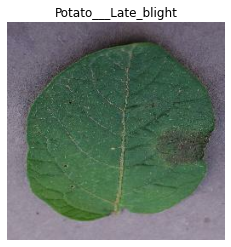

In [ ]:
#dataset.take(1) == Take first Batch.

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")


## Splitting the Dataset.

In [ ]:
# 80% ==> training.
# 20% ==> 10% validation, 10% test.

## Calculate the size of the Training dataset from Total Length of Dataset.

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

## Take 80% of the Dataset Length for Training.

In [ ]:
# Take first 54 batches (Each batch is of size 32).
# Where 54 = 80% of Dataset Length.
train_ds = dataset.take(54)
len(train_ds)

54

## Take the Remaining 20% of the total Dataset Length as Testing Data.

In [ ]:
#dataset.skip(54) == skip the first 54 and take the rest.
test_ds = dataset.skip(54)
len(test_ds)

14

## Now split the Test data (20% of the Total Data) into Validation (10%) and Test(10%) data.

In [ ]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
#Therefore Validation Data (val_ds) == first 6 Samples.
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
#Let test_ds take the remaining samples after val_ds has taken 6%.
test_ds = test_ds.skip(6)
len(test_ds)

8

## We can also make a Function that partitions the Dataset automatically.

In [ ]:
#The initial values given in the function parameters serve as default values incase the function call doesnt give the values.
def get_dataset_partitions_tf (ds , train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000 ):
    #Total size of the dataset passed as an arguement.
    ds_size = len(ds)

    #If the function call was made with boolean shuffle = True.
    #Then we shuffle the Dataset to obtain different results, (NB: seed will have to be changed!).
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split*ds_size) #int to get rid of decimals.
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size) #Take first 80% as Training Data.

    #Then skip 80% that has been taken as training data, then out of the remaining 20% take 10% which is validation data.
    val_ds = ds.skip(train_size).take(val_size)

    #Now skip the 10% that was taken as validation data and use the rest as testing data.
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
#Lets test the function by calling it using the name of our Dataset (ourdatasetname == dataset).
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

print("Training Dataset = "+str(len(train_ds))+"\n","Validation Dataset = "+str(len(val_ds))+"\n","Testing Dataset = "+str(len(test_ds))+"\n","Size of Dataset = "+str(len(dataset)))

Training Dataset = 54
 Validation Dataset = 6
 Testing Dataset = 8
 Size of Dataset = 68


## Now we do caching, reading the images from the Disk and storing them in memory.

In [ ]:
#This improves the performance of the Pipeline.
#The following code lets tensorflow decide how many batches to load when GPU is training.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## Pre-processing Layer

In [ ]:
#Scaling the numpy array (Pre-Processing is usually the first step in any image processing).
#The numpy array was an RGB scale, so we divide by 255 to get values between 0 and 1.
resize_and_rescale = tf.keras.Sequential([
    #Resize so that during prediction any image that is not 256*256 will be resized
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Data Augmentation Layer

In [ ]:
#And for Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## Building the Model (CNN)

In [ ]:
#Whenever you feed in an image, first do pre-processing, then data augmentation.
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    #After each (convolution+ReLU) comes Pooling and finally Flattening to an Array of neurons.
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    #Last Layer has 3 Neurons
    #Softmax activation function will normalize the probability of our classes
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

## Model Summary

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

## Compliling the Model

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Training the Model

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    #Validation data is used in each Epoch to track accuracy during training!
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 13s 156ms/step - loss: 0.9219 - accuracy: 0.5069 - val_loss: 0.8739 - val_accuracy: 0.4740
Epoch 2/50
54/54 [==============================] - 5s 92ms/step - loss: 0.7283 - accuracy: 0.6534 - val_loss: 0.5013 - val_accuracy: 0.7917
Epoch 3/50
54/54 [==============================] - 5s 93ms/step - loss: 0.4522 - accuracy: 0.8194 - val_loss: 0.3913 - val_accuracy: 0.8333
Epoch 4/50
54/54 [==============================] - 5s 92ms/step - loss: 0.3429 - accuracy: 0.8565 - val_loss: 0.3585 - val_accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 5s 93ms/step - loss: 0.3076 - accuracy: 0.8785 - val_loss: 0.4915 - val_accuracy: 0.7812
Epoch 6/50
54/54 [==============================] - 5s 92ms/step - loss: 0.3778 - accuracy: 0.8461 - val_loss: 0.4518 - val_accuracy: 0.8073
Epoch 7/50
54/54 [==============================] - 5s 92ms/step - loss: 0.3213 - accuracy: 0.8576 - val_loss: 0.3017 - val_accuracy: 0.8750
Epoch 8/50


## Evaluate the model on Data it has never seen.

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 34ms/step - loss: 0.0477 - accuracy: 0.9883


In [ ]:
#model.evaluate returns a python list with first element as loss and second as accuracy.
scores

[0.04773779585957527, 0.98828125]

## Checking How the training went using History

In [ ]:
#history is keras.callbacks.History
history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#The Keys in the History dictionary return lists of values during training.
history.history['accuracy']

[0.5069444179534912,
 0.6533564925193787,
 0.8194444179534912,
 0.8564814925193787,
 0.8784722089767456,
 0.8460648059844971,
 0.8576388955116272,
 0.8894675970077515,
 0.9131944179534912,
 0.9247685074806213,
 0.9311342835426331,
 0.9409722089767456,
 0.9311342835426331,
 0.9444444179534912,
 0.9363425970077515,
 0.9415509104728699,
 0.9565972089767456,
 0.9502314925193787,
 0.9618055820465088,
 0.9565972089767456,
 0.96875,
 0.9606481194496155,
 0.9600694179534912,
 0.9658564925193787,
 0.9768518805503845,
 0.9716435074806213,
 0.9849537014961243,
 0.9837962985038757,
 0.9664351940155029,
 0.9780092835426331,
 0.9832175970077515,
 0.9878472089767456,
 0.9710648059844971,
 0.9826388955116272,
 0.9658564925193787,
 0.9837962985038757,
 0.9872685074806213,
 0.9866898059844971,
 0.9861111044883728,
 0.9820601940155029,
 0.9924768805503845,
 0.9809027910232544,
 0.9901620149612427,
 0.9953703880310059,
 0.9693287014961243,
 0.9878472089767456,
 0.9913194179534912,
 0.9895833134651184,
 0.

In [ ]:
#We can then store the lists from the history dictionary and use them to make plots.
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

## Matplotlib Plots of the History Data

Text(0.5, 1.0, 'Training and Validation Loss')

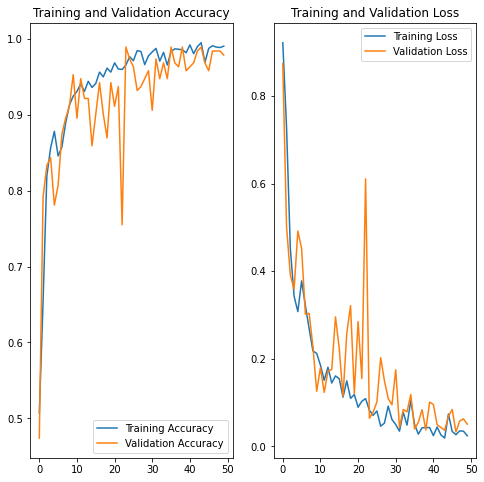

In [ ]:
#Matplot lib plots can be used to determine how many EPOCHS were required to give the best accuracy.
#The Accuracy Chart
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

#The loss Chart
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 98ms/step
predicted label: Potato___Early_blight


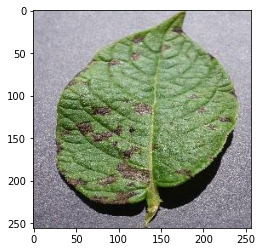

In [ ]:
## Testing The model
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


<ipython-input-74-2828afd142f8>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3,3, i+1)


1/1 [==============================] - 0s 16ms/step


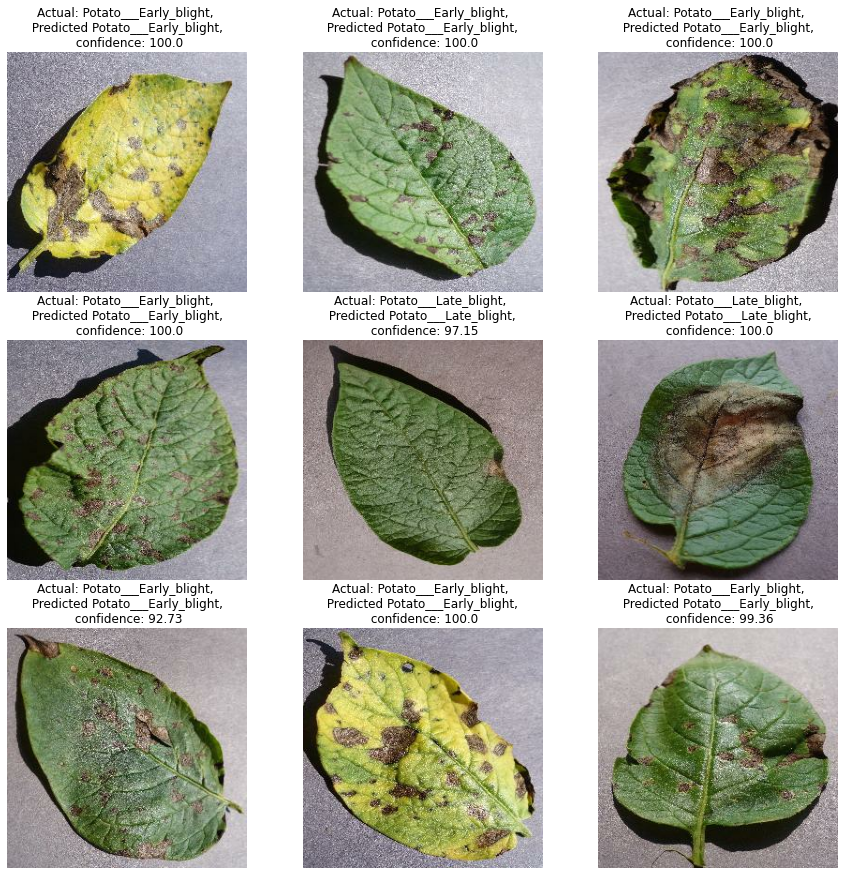

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted {predicted_class}, \n confidence: {confidence}")
    plt.axis("off")

In [ ]:
# import os
# model_version = max([int(i) for i in os.listdir("../content/drive/MyDrive/models")]) + 1
model_version = 1
model.save(f"../content/drive/MyDrive/models{model_version}")